### Import libraries

In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt

### States & Transition Probabilities

In [2]:
states = {0, 1, 2}
trans_prob = [[0.4, 0.5, 0.1], [0.7, 0.2, 0.1], [0.0, 0.3, 0.7]]

### Function to get the next state

In [3]:
## Function to get the next state from the current state (using transition probability)
def get_next_state_mc(trans_row):
    
    """
    trans_row : Transition probabilities from the current state
    """
    
    r = np.random.uniform(0, 1)
    cum_sum = [0] + [sum(trans_row[:i]) for i in range(1, len(trans_row)+1)]
    
    for i in range(1, len(cum_sum)+1):
        
        if cum_sum[i-1] <= r < cum_sum[i]:
            
            next_state = i-1
            break
    
    return next_state

### Simulation

In [4]:
## Simulation
def simulate_chain(states, trans_prob, initial_state = 0, n_runs = 1000):
    
    '''
    states : different states
    trans_prob : transition matrix
    initial_state : state from which the chain starts
    n_runs : number of times we simulate

    '''
    
    state_history = [initial_state]
    current_state = initial_state
    
    for i in range(n_runs -1):
        
        trans_row = trans_prob[current_state]
        next_state = get_next_state_mc(trans_row)
        state_history.append(next_state)
        current_state = next_state
    
    return state_history

In [5]:
state_history = simulate_chain(states, trans_prob)
print(state_history[:100])

[0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]


### Estimate the transition probabilities to compare with the true(given) ones

In [6]:
## Function for normalizing 2-d numpy arrays
def normalize_array(x, col_norm = False):
    
    x = x.astype(float)

    if col_norm == True:
        x = np.transpose(x)
        
    for i in range(x.shape[0]):
        x[i] = x[i] / np.sum(x[i])
    
    return np.transpose(x) if col_norm == True else x

def estimated_trans_prob(states, state_seq):
    
    '''
    states : different states -- list of unique states
    state_seq : simulated state chain
    
    '''
    state_transition = np.zeros((len(states),len(states)))
    
    for i in range(1, len(state_seq)):
        x, y = state_seq[i-1], state_seq[i]
        state_transition[x, y] += 1
        
    return normalize_array(state_transition)

print("Estimated Transition Probabilities: \n", estimated_trans_prob(states, state_history))
print("-"*50, "\nTrue Transition Probabilities: \n", np.array(trans_prob))

Estimated Transition Probabilities: 
 [[0.42685851 0.441247   0.13189448]
 [0.72205438 0.18731118 0.09063444]
 [0.         0.33864542 0.66135458]]
-------------------------------------------------- 
True Transition Probabilities: 
 [[0.4 0.5 0.1]
 [0.7 0.2 0.1]
 [0.  0.3 0.7]]


### State distribution

In [7]:
def state_distribution_with_iterations(state_history):
    
    '''
    state_history : simulated state chain
    
    '''
    
    state_prob = []

    for i in range(len(state_history)):
        state_prob.append([1 if state_history[i] == j else 0 for j in range(len(states))])
        
    state_dists = normalize_array(np.cumsum(state_prob, axis = 0))
    
    return state_dists

### Visualize the distribution history

In [8]:
distHistory = state_distribution_with_iterations(state_history)
distHistory

array([[1.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [0.33333333, 0.66666667, 0.        ],
       ...,
       [0.41783567, 0.33066132, 0.25150301],
       [0.41741742, 0.33133133, 0.25125125],
       [0.418     , 0.331     , 0.251     ]])

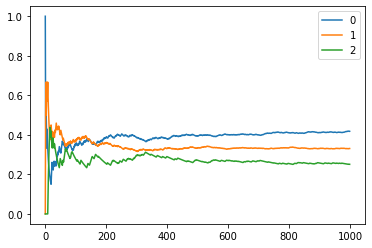

In [9]:
plt.plot(distHistory)
plt.legend([0,1,2])
plt.show()

Here the distribution converges to a stationary distribution [0.501, 0.412, 0.0865]